# Lab 3 : Logistic Regression

---


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Importing the dataset

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Feature vectors
X = mnist.data

In [4]:
X.shape

(70000, 784)

In [5]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
# Reshape the feature vector to a 28x28 image
image = X[0].reshape(28, 28)

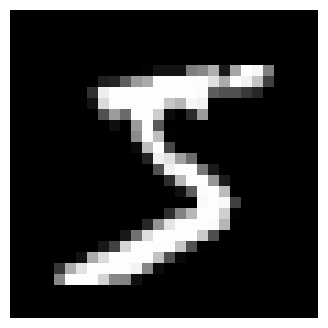

In [7]:
# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
# Labels
y = mnist.target.astype(int)
y[0]

5

In [9]:
y.shape

(70000,)

## Splitting the dataset into training and test set

In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50000, random_state=42)

In [11]:
print(X_train.shape)

(50000, 784)


In [12]:
print(y_train.shape)

(50000,)


In [13]:
print(X_test.shape)

(20000, 784)


In [14]:
print(y_test.shape)

(20000,)


In [15]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
y_train[0]

4

## Applying feature scaling

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00483977, -0.00630411, -0.00447218,
       -0.00447218,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00447218, -0.006822  , -0.00803327,
       -0.01034532, -0.0137186 , -0.01849524, -0.02320428, -0.0276638 ,
       -0.02922222, -0.03128989, -0.03215922, -0.02784004, -0.02905456,
       -0.02737972, -0.02326904, -0.01839325, -0.01740434, -0.01121283,
       -0.00808932, -0.00447218,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00856428, -0.01133766, -0.01822544, -0.02836925, -0.03764314,
       -0.05301182, -0.06751055, -0.08542018, -0.10250723, -0.11

## One-vs-Rest approach

In [19]:
lb = LabelBinarizer()
y_train_one_vs_rest = lb.fit_transform(y_train)
y_test_one_vs_rest = lb.transform(y_test)

In [20]:
y_train_one_vs_rest[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

## Sigmoid function

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## 1. Logistic regression single prediction

In [22]:
def predict_single(weight, features):
    z = np.dot(weight, features)
    return sigmoid(z)

## 2. Logistic regression vector prediction

In [23]:
def predict_vector(weight, feature_matrix):
    z = np.dot(feature_matrix, weight)
    return sigmoid(z)

## 3. Logistic loss

In [24]:
def logistic_loss(weight, feature_matrix, labels):
    predictions = predict_vector(weight, feature_matrix)
    loss = -np.mean(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions))
    return loss

## 4. Gradient of logistic loss

In [25]:
def gradient_of_logistic_loss(weight, feature_matrix, labels):
    predictions = predict_vector(weight, feature_matrix)
    gradient = np.dot(feature_matrix.T, (predictions - labels)) / len(labels)
    return gradient

## 5. Gradient descent algorithm

In [26]:
def gradient_descent(weight, feature_matrix, labels, learning_rate, stopping_criterion, batch_size=None):
    if batch_size is None:
        # Vanilla Gradient Descent
        while True:
            gradient = gradient_of_logistic_loss(weight, feature_matrix, labels)
            weight = weight - learning_rate * gradient
            if np.linalg.norm(gradient) < stopping_criterion:
                break
    else:
        # Stochastic Gradient Descent
        num_batches = len(labels) // batch_size
        for _ in range(num_batches):
            random_indices = np.random.choice(len(labels), batch_size, replace=False)
            batch_features = feature_matrix[random_indices]
            batch_labels = labels[random_indices]
            gradient = gradient_of_logistic_loss(weight, batch_features, batch_labels)
            weight = weight - learning_rate * gradient
    return weight

## 6. Application of logistic regression

In [27]:
# Train the model
num_classes = len(lb.classes_)
weights = []
for i in range(num_classes):
    weights.append(gradient_descent(np.zeros(X_train.shape[1]), X_train, y_train_one_vs_rest[:, i],
                                     learning_rate=0.01, stopping_criterion=1e-4, batch_size=32))

In [28]:
# Predictions
y_pred = np.argmax(predict_vector(np.array(weights).T, X_test), axis=1)

In [29]:
# Evaluation
results = pd.DataFrame(index=range(num_classes), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
for i in range(num_classes):
    results.loc[i] = [accuracy_score(y_test == i, y_pred == i),
                      precision_score(y_test == i, y_pred == i),
                      recall_score(y_test == i, y_pred == i),
                      f1_score(y_test == i, y_pred == i)]

In [30]:
print(results)

  Accuracy Precision    Recall  F1 Score
0   0.9735  0.811092  0.952187  0.875994
1   0.9646  0.769908  0.975446  0.860575
2   0.9631  0.851812  0.772437  0.810185
3   0.9584  0.800195   0.79476  0.797468
4   0.9692   0.81106  0.865101  0.837209
5  0.95715  0.836237  0.658617  0.736874
6  0.97715   0.88107  0.891228   0.88612
7   0.9577  0.790337  0.826994   0.80825
8   0.9518  0.796621  0.665795  0.725356
9   0.9523  0.801531  0.688069  0.740479


## Visualizing the predictions vs actual

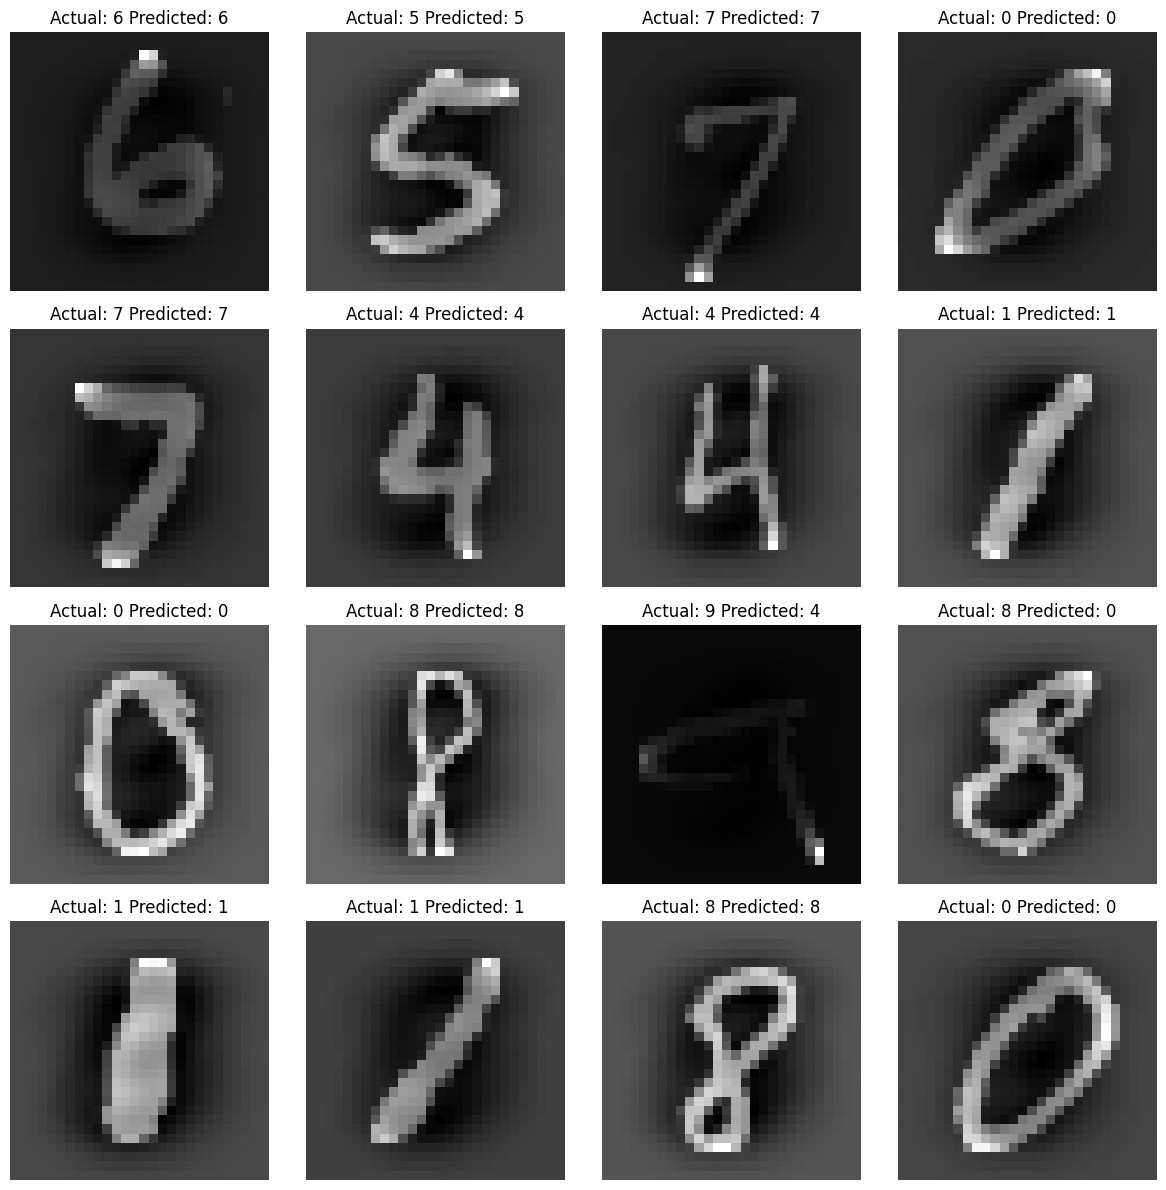

In [32]:
# Choose 16 random indices from the test set
sample_indices = np.random.choice(len(X_test), 16, replace=False)

sample=[]
sample_y=[]
for i in sample_indices:
  sample.append(X_test[i])
  sample_y.append(y_test[i])
predictions = np.argmax(predict_vector(np.array(weights).T, sample), axis=1)

# Plot the images and their predictions
plt.figure(figsize=(12, 12))
for i in range(16):
    image = sample[i].reshape(28, 28)
    prediction = predictions[i]
    actual = sample_y[i]

    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual: {actual} Predicted: {prediction}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Conclusion

## 1. Overall Accuracy

The overall accuracy of the model on the test set is reasonably high, ranging from approximately 95.37% to 97.66%. This indicates that the model is performing well in terms of correctly predicting the digits.

## 2. Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positives. The precision values for each class range from approximately 77.20% to 88.00%. This indicates the percentage of instances predicted as positive that are actually positive.

## 3. Recall

Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. The recall values for each class range from approximately 66.69% to 97.37%. This indicates the percentage of actual positives that were correctly predicted by the model.

## 4. F1 Score

F1 Score is the weighted average of Precision and Recall. It balances precision and recall and is useful when there is an uneven class distribution. The F1 score for each class ranges from approximately 73.35% to 88.31%.

## 5. Class-Specific Performance

The performance varies across different digits (classes). Some digits have higher precision, while others have higher recall. It might be beneficial to analyze the specific characteristics of each digit and consider if certain digits are more challenging for the model.

## 6. Imbalance

The dataset might have class imbalance, and it's important to consider this when interpreting the results. If some classes have significantly fewer instances than others, it can affect the overall performance metric

## Summary

In summary, the model is performing well overall, but there are variations in performance across different digits. Further analysis and fine-tuning could be done to improve the model, such as experimenting with hyperparameters, considering regularization, or exploring more advanced models. Additionally, understanding the misclassifications and exploring techniques like data augmentation might be beneficial for further improvement.



---



---

